# TD 7: Analyse de logs - Corrigé (parties 2 et 3)

Dans cette activité on va faire une analyse de fichiers de log.
Pour cela on a récupéré 75Mo de logs du service système SSHD, qui gère les connections entrantes SSH.
Un échantillon du fichier (2000 lignes) est disponible sur la page Moodle du cours, et l'ensemble des logs peut être obtenu de la plateforme [Zenodo](https://zenodo.org/record/3227177#.Y4jQZuzMKuU)
Ici on a découpé le gros fichier obtenu de Zenodo en une trentaine de fichiers plus petits, un par jour. Ceci ressemble à ce qu'on trouverait dans un contexte réel.

On peut voir la liste de fichiers en faisant ```listdir```:

In [1]:
import os
os.chdir("../log files/ssh_logs/")
os.listdir(".")

['SSHDec31.log',
 'SSHDec19.log',
 'SSHJan4.log',
 'SSHJan5.log',
 'SSHDec18.log',
 'SSHDec30.log',
 'SSHDec26.log',
 'SSHJan7.log',
 'SSHJan6.log',
 'SSHDec23.log',
 'SSHJan2.log',
 'SSHJan3.log',
 'SSHDec22.log',
 'SSHDec20.log',
 'SSHJan1.log',
 'SSHDec21.log',
 'SSHDec10.log',
 'SSHDec11.log',
 'SSHDec13.log',
 'SSHDec12.log',
 'SSHDec16.log',
 'SSHDec17.log',
 'SSHDec29.log',
 'SSHDec15.log',
 'SSHDec14.log']

__(On saute le reste du tutoriel)__

## Partie II: Exercice guidé - consolider l'ensemble de l'analyse sur les différents fichiers

Dans cette partie on va étendre l'analyse faite ici à l'ensemble des 25 fichiers de logs, et sauvegarder les résultats dans un nouveau fichier.

Pour cet exercice il est nécessaire de collecter les fichiers de log, qui sont disponibles sur Moodle.

__2.1__ Commençons par préparer le code pour lire tous les fichiers les uns après les autres. Écrire une boucle qui énumère les fichiers de log, et affiche la première ligne de chaque fichier.

In [4]:
import os
os.chdir("../log files/ssh_logs/")
fichiers = os.listdir(".")
for nf in fichiers:
    if(nf.endswith(".log")): # pour eviter d'ouvrir un fichier zip (ou autre) qui se trouverait au meme endroit
        with open(nf, 'r') as f:
            print(f.readline(), end="") #pas de retrour à la ligne apres l'impression, car la ligne contient deja le retour a la ligne

Dec 31 00:00:00 LabSZ sshd[29770]: Failed password for invalid user support from 103.207.39.212 port 60305 ssh2
Dec 19 00:01:53 LabSZ sshd[9209]: Invalid user candy from 202.92.128.175
Jan  4 00:00:00 LabSZ sshd[10691]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=218.87.109.156  user=root
Jan  5 00:00:00 LabSZ sshd[9632]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=59.63.188.30  user=root
Dec 18 00:15:03 LabSZ sshd[5809]: Invalid user luyang from 115.71.16.143
Dec 30 00:01:19 LabSZ sshd[5186]: reverse mapping checking getaddrinfo for host229-140-211-80.serverdedicati.aruba.it [80.211.140.229] failed - POSSIBLE BREAK-IN ATTEMPT!
Dec 26 10:55:32 LabSZ sshd[1155]: Server listening on 0.0.0.0 port 902.
Jan  7 00:01:59 LabSZ sshd[26302]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=185.165.29.69  user=root
Jan  6 00:02:02 LabSZ sshd[21059]: pam_unix(sshd:auth): 

__2.2__ Reprendre l'ensemble du code vu au-dessus pour compter les adresses IP utilisées. Attention: les comptages doivent être consolidés pour toute la période.

In [7]:
liste_IP = {} # dictionnaire vide
fichiers = os.listdir(".")
for nf in fichiers:
    if(nf.endswith(".log")):
        with open(nf, "r") as f:
            for ligne in f: # on énumère toutes les lignes du fichier
                mots = ligne.split() # decouper la chaine de caracteres en mots (avec les espaces comme séparateurs)
                if (mots[5]=="Failed" and mots[6]=="password"): #échec de connection
                    if(mots[8]=="invalid" and mots[9]=="user"):
                        ip = mots[12]
                    else:
                        ip = mots[10]
                    #print("connection depuis", ip)
                    liste_IP[ip] = liste_IP.get(ip,0) + 1 # comptage

# obtenir une représentation des paires clés-valeurs
paires = [ k+" : compte="+str(v) for k,v in liste_IP.items()]
print("---------- addresses IP d'origine: (20 sur", len(paires),")")
echantillon = paires[0:20] # on va pas tout afficher
print('\n'.join(echantillon)) # affichage de la liste sur des lignes différentes (retour à la ligne comme séparateur)

---------- addresses IP d'origine: (20 sur 936 )
103.207.39.212 : compte=63
5.18.248.14 : compte=6
181.214.87.4 : compte=343
103.207.39.99 : compte=8
216.71.19.2 : compte=2
5.188.10.182 : compte=597
195.154.45.62 : compte=21
169.0.180.253 : compte=97
179.242.211.208 : compte=1
218.65.30.126 : compte=913
185.165.31.41 : compte=2
220.191.194.22 : compte=7
186.65.144.113 : compte=1
124.192.211.203 : compte=1
188.81.140.127 : compte=1
45.32.212.203 : compte=4
110.74.192.131 : compte=1
156.202.254.121 : compte=1
185.165.29.57 : compte=413
92.228.200.147 : compte=1


__2.3__ En affichant les premières lignes de tous les fichiers, on peut remarquer dans certains fichiers (ex: le 1er Janvier) des lignes de la forme:
```
Jan  1 22:38:31 LabSZ sshd[16315]: message repeated 3 times: [ Failed password for root from 218.65.30.30 port 52352 ssh2]
```
Ceci indique qu'il y a eu 3 fois 'Failed password...', soit 3 tentatives de connection pour la même adresse Ip et le même nom d'utilisateur. Ajouter du code pour comptabiliser ces connections (attention: pour cette ligne il faut comptabiliser l'adresse IP 3 fois, et dans d'autres cas 5 fois, etc. selon le nombre de répétitions indiqué).

In [11]:
def obtenir_ip(tokens): #on extrait ce code pour en faire une fonction
    #tokens de la forme ['root', 'from', '218.65.30.30', 'port', '52352', 'ssh2']
    #     ou bien       ['invalid', 'user', 'support', 'from', '103.207.39.212', 'port', '60305', 'ssh2']
    if(tokens[0]=="invalid" and tokens[1]=="user"):
        ip = tokens[4]
    else:
        ip = tokens[2]
    return ip


liste_IP = {} # dictionnaire vide
fichiers = os.listdir(".")
for nf in fichiers:
    if(nf.endswith(".log")):
        with open(nf, "r") as f:
            for ligne in f: # on énumère toutes les lignes du fichier
                mots = ligne.split() # decouper la chaine de caracteres en mots (avec les espaces comme séparateurs)
                if (mots[5]=="Failed" and mots[6]=="password"): #échec de connection
                    ip = obtenir_ip(mots[8:])
                    liste_IP[ip] = liste_IP.get(ip,0) + 1 # comptage
                elif (mots[5]=="message" and mots[6]=="repeated" and mots[10]=='Failed' and mots[11]=='password'): #message répété
                    times = int(mots[7]) # combien de fois il faut compter 
                    ip = obtenir_ip(mots[13:])
                    liste_IP[ip] = liste_IP.get(ip,0) + times # comptage


# obtenir une représentation des paires clés-valeurs
paires = [ k+" : compte="+str(v) for k,v in liste_IP.items()]
print("---------- addresses IP d'origine: (20 sur", len(paires),")")
echantillon = paires[0:20] # on va pas tout afficher
print('\n'.join(echantillon)) # affichage de la liste sur des lignes différentes (retour à la ligne comme séparateur)

---------- addresses IP d'origine: (20 sur 937 )
103.207.39.212 : compte=63
5.18.248.14 : compte=6
181.214.87.4 : compte=343
103.207.39.99 : compte=8
216.71.19.2 : compte=2
5.188.10.182 : compte=597
195.154.45.62 : compte=21
169.0.180.253 : compte=97
179.242.211.208 : compte=1
218.65.30.126 : compte=5429
185.165.31.41 : compte=2
220.191.194.22 : compte=7
186.65.144.113 : compte=1
124.192.211.203 : compte=6
188.81.140.127 : compte=6
45.32.212.203 : compte=4
110.74.192.131 : compte=1
156.202.254.121 : compte=1
185.165.29.57 : compte=413
92.228.200.147 : compte=6


__2.4__ Ici on s'est limité à répertorier les addresses IP d'origine des connections. Il est aussi pertinent de répertorier les noms d'utilisateurs ciblés, afin de savoir quels mots de passe sont les plus importants à sécuriser (changer fréquemment, utiliser une grande longueur et des caractères spéciaux, etc.)

Ajouter du code pour compter les connections sur les différents noms d'utilisateurs.

In [13]:
def obtenir_ip_user(tokens): #on change la fonction pour obtenir une paire user, adresse ip
    #tokens de la forme ['root', 'from', '218.65.30.30', 'port', '52352', 'ssh2']
    #     ou bien       ['invalid', 'user', 'support', 'from', '103.207.39.212', 'port', '60305', 'ssh2']
    if(tokens[0]=="invalid" and tokens[1]=="user"):
        user = tokens[2]
        ip = tokens[4]
    else:
        user= tokens[0]
        ip = tokens[2]
    return user, ip

liste_IP = {} # dictionnaire vide
liste_user = {} # dictionnaire vide
fichiers = os.listdir(".")
for nf in fichiers:
    if(nf.endswith(".log")):
        with open(nf, "r") as f:
            for ligne in f: # on énumère toutes les lignes du fichier
                mots = ligne.split() # decouper la chaine de caracteres en mots (avec les espaces comme séparateurs)
                if (mots[5]=="Failed" and mots[6]=="password"): #échec de connection
                    user, ip = obtenir_ip_user(mots[8:])
                    liste_IP[ip] = liste_IP.get(ip,0) + 1 # comptage
                    liste_user[user] = liste_user.get(user,0) + 1 # comptage
                elif (mots[5]=="message" and mots[6]=="repeated" and mots[10]=='Failed' and mots[11]=='password'): #message répété
                    times = int(mots[7]) # combien de fois il faut compter 
                    user, ip = obtenir_ip_user(mots[13:])
                    liste_IP[ip] = liste_IP.get(ip,0) + times # comptage
                    liste_user[user] = liste_user.get(user,0) + times # comptage # attention aux copier-collers !


# obtenir une représentation des paires clés-valeurs
paires_ip = [ k+" : compte="+str(v) for k,v in liste_IP.items()]
paires_u = [ k+" : compte="+str(v) for k,v in liste_user.items()]

print("---------- addresses IP d'origine: (20 sur", len(paires_ip),")")
echantillon = paires_ip[0:20] # on va pas tout afficher
print('\n'.join(echantillon)) # affichage de la liste sur des lignes différentes (retour à la ligne comme séparateur)
print("---------- noms d'utilisateurs ciblés: (20 sur", len(paires_u),")")
echantillon = paires_u[0:20] # on va pas tout afficher
print('\n'.join(echantillon)) # affichage de la liste sur des lignes différentes (retour à la ligne comme séparateur)

---------- addresses IP d'origine: (20 sur 937 )
103.207.39.212 : compte=63
5.18.248.14 : compte=6
181.214.87.4 : compte=343
103.207.39.99 : compte=8
216.71.19.2 : compte=2
5.188.10.182 : compte=597
195.154.45.62 : compte=21
169.0.180.253 : compte=97
179.242.211.208 : compte=1
218.65.30.126 : compte=5429
185.165.31.41 : compte=2
220.191.194.22 : compte=7
186.65.144.113 : compte=1
124.192.211.203 : compte=6
188.81.140.127 : compte=6
45.32.212.203 : compte=4
110.74.192.131 : compte=1
156.202.254.121 : compte=1
185.165.29.57 : compte=413
92.228.200.147 : compte=6
---------- noms d'utilisateurs ciblés: (20 sur 1740 )
support : compte=446
ubnt : compte=184
0101 : compte=171
0 : compte=148
1234 : compte=174
admin : compte=7150
default : compte=131
ftp : compte=144
guest : compte=223
operator : compte=82
osmc : compte=47
root : compte=220738
test : compte=499
Management : compte=29
nagios : compte=278
system : compte=11
steam : compte=16
hduser : compte=11
oracle : compte=458
butter : compte=

__2.5__ On veut sauvegarder l'information dans des fichiers (un fichier pour les adresses IP, un fichier pour les noms d'utilisateur). Ajouter du code pour ouvrir un fichier "adressesIP.txt" et sauvegarder la liste des adresses IP / comptes (une par ligne), et un fichier semblable pour les noms d'utilisateur.

In [17]:
# on a déjà les comptes complets pour les adresses ip et noms d'utilisateur, on va juste les sauvegarder
# on fait une fonction car c'est deux fois la même chose
def sauvegarder(paires, nomfichier):
    with open(nomfichier, "w") as f1:
        for info, compte in paires.items(): # .items()  parce que "paires" est un dictionnaire
            f1.write(info+"\t"+str(compte)+"\n") # on met une tabulation entre l'adresse ip (ou username) et le compte

sauvegarder(liste_IP, "adressesIP.txt")
sauvegarder(liste_user, "noms_utilisateurs.txt")

## Partie III - Exercice non guidé: l'évolution des attaques dans le temps. 

L'analyse précédente avait pour but de collecter des informations sur les tentatives d'intrusion (les adresses IP d'ou elles proviennent, les noms d'utilisateurs ciblés), sur l'ensemble des données.

Dans cet exercice le but est plutôt de voir comment se répartissent les tentatives d'intrusion dans le temps.
On voudrait savoir si elles surviennent plutôt la nuit, le matin, l'apres-midi... 
Pour ceci on voudrait pour chaque jour dans les données, collecter les heures auxquelles les tentatives d'intrusion se produisent. On aimerait ensuite diviser la journée en 24h et tracer une courbe qui montre la proportion des tentatives d'intrusion qui se produisent à chaque heure de la journée.

D'autre part, on peut observer dans les logs, des connections réussies. Les lignes ont la forme suivante:
```
Dec 17 15:02:50 LabSZ sshd[4627]: Accepted password for fztu from 119.137.63.195 port 53927 ssh2
```
On peut aussi tracer le nombre de connections réussies (a priori légitimes) dans la journée, et comparer les deux courbes.

Indications pour le tracé des courbes:
Il est nécessaire d'avoir un ensemble de données de la forme ```(x, y)```, soit un ensemble de paires ```(heure, nombre de connection)```, pour heure = \[0, 2, 3,... 23\]. 

On peut ensuite utiliser la bibliothèque ```matplotlib```, en adaptant l'exemple suivant:

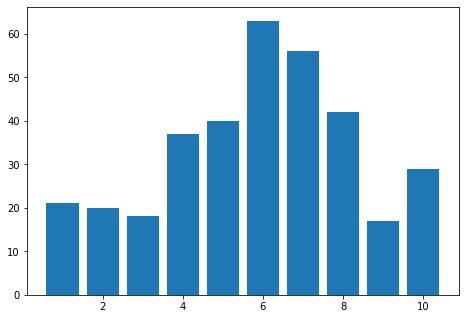

In [49]:
import matplotlib.pyplot as plt
# exemple de données
donnees = [(1, 21), (2,20), (3, 18), (4, 37), (5,40), (6,63), (7,56), (8, 42), (9, 17), (10, 29)]
x =[a[0] for a in donnees]
y =[a[1] for a in donnees]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)

plt.show()

On organise le code en fonctions 
Celle-ci pour obtenir les connections (échecs / succès) à partir de la liste de fichiers:

In [18]:
def obtenir_connections(fichiers):
	conn_fail = {} # echecs de connection: dictionnaires {heure => compte} pour cette heure de la journée
	conn_succ = {} # connections réussies
	
	for nf in fichiers:
		with open(nf, "r") as f:
			for ligne in f: # on énumère toutes les lignes du fichier
				mots = ligne.split() # decouper la chaine de caracteres en mots (avec les espaces comme séparateurs)
				heure = int(mots[2][0:2]) # heure: deux premiers caractères du token à la position 2
				if (mots[5]=="Failed" and mots[6]=="password") or (mots[5]=="message" and mots[6]=="repeated" and mots[10]=='Failed' and mots[11]=='password'): #échec de connection
					conn_fail[heure] = conn_fail.get(heure,0) + 1
				elif (mots[5]=="Accepted" and mots[6]=="password"): #connection réussie
					conn_succ[heure] = conn_succ.get(heure,0) + 1
	return conn_fail, conn_succ # on renvoie les succes et les échecs

On adapte le code pour faire un diagramme en barre (on en fait une fonction aussi):

In [22]:
import matplotlib.pyplot as plt
def diagramme_barres(info):
	#il faut convertir les dictionnaires en données de la forme: [(1, 21), (2,20), (3, 18), (4, 37), (5,40), (6,63), (7,56), (8, 42), (9, 17), (10, 29)]
	paires = [(h, cpte) for h,cpte in info.items()] # on aurait aussi pu faire list(echecs.items())
	donnees = sorted(paires) # par défaut sera trié par heure (premeir élément de chaque paire)

	x =[a[0] for a in donnees]
	y =[a[1] for a in donnees]

	fig = plt.figure()
	ax = fig.add_axes([0,0,1,1])
	ax.bar(x,y)
	plt.show()

On peut maintenant exécuter: on liste les fichiers à explorer, et on les analyse pour avoir les heures de connection:

In [20]:
fichiers = os.listdir(".")
flog = [nomf for nomf in fichiers if nomf.endswith(".log")] # on selectionne seulement les noms de fichier se terminant par '. log'
echecs, succes = obtenir_connections(flog)

Diagramme en barre pour les heures des connections échouées:

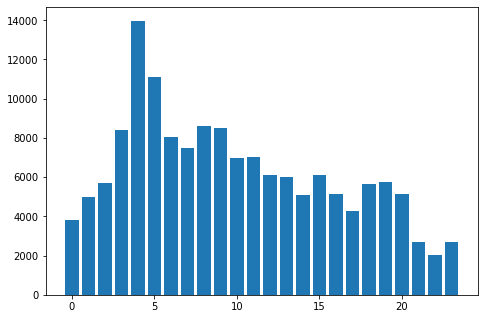

In [23]:
diagramme_barres(echecs)

On observe le gros de l'activité entre 3h et 9h du matin, avec un pic entre 4h et 5h; ensuite l'activité décroit de 10h à minuit, avant de remonter entre minuit et 3h.

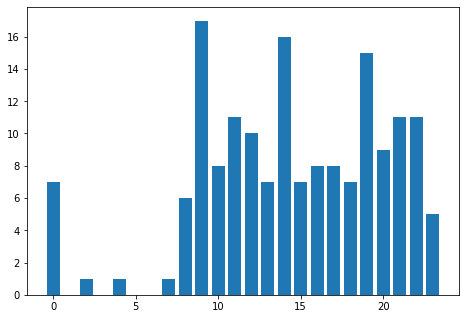

In [24]:
diagramme_barres(succes)

Ici on observe trois pics de connections: le matin entre 9h et 10h (arrivée au travail?), puis entre 14h et 15h (après une pause de midi?), et à nouveau entre 19h et 20h (apres le retour à la maison?). Il y a aussi des connections de temps en temps à toutes les heures de la journée entre 8h et 1h du matin, et presque jamais entre 1h et 8h.

En comparant les hauteurs des barres on remarque aussi qu'il y a environ 1000x plus de tentatives d'intrusion que de connections légitimes, ce qui est assez frappant.